### Neural Networks

* a neural network is a multilayered regression containing layers of weights, biases, and nonlinear functions that reside between input variables and output variables. 
* Deep learning is a popular variant of neural networks that utilizes multiple “hidden” (or middle) layers of nodes containing weights and biases. Each node resembles a linear function before being passed to a nonlinear function (called an activation function).
* Just like linear regression, optimization techniques like stochastic gradient descent are used to find the optimal weight and bias values to minimize the residuals.

When to use neural networks vs. linear and logistic regression?

* structured data (represented in a table with rows and columns) - Linear regression and logistic regression, as well as gradient boosted trees do excellent predictions.

* perceptual problems like image classification, we are trying to find fuzzy correlations between groups of pixels to identify shapes and patterns - neural networks

* * The same applies for predicting the next four or five words in a sentence being typed, or deciphering the words being said in an audio clip. 

A simple neural network with only one hidden layer will be built to illustrate a complex technique by applying it to a simple problem (this problem could be solved by logistic regr or even a formula).

We want to predict whether a font should be light (1) or dark (0) for a given color background.
* the first layer is simply an input of the three color variables (R,G,B)
* the hidden (middle) layer has three nodes, or functions of weights and biases, between the inputs and outputs. 
* Each node is essentially a linear function with slopes Wi and intercepts Bi being multiplied and summed with input variables Xi; X1 * W1 + X2 * W2 + X3 * W3 + B1.
* There is a weight Wi between each input node and hidden node, and another set of weights between each hidden node and output node. Each hidden and output node gets an additional bias Bi added.
* the output node repeats the same operation, taking the resulting weighted and summed outputs from the hidden layer and making them inputs into the final layer, where another set of weights and biases will be applied. W10 * (X1 * W1 + X2 * W2 + X3 * W3 + B1) + W11 * ... + B4


In a nutshell, this is a regression just like linear or logistic regression, but with many more parameters to solve for.
* The weight and bias values are analogous to the m and b, or β1 and β0, parameters in a linear regression.
* We do use stochastic gradient descent and minimize loss just like linear regression, but we need an additional tool called backpropagation to untangle the weight Wi and bias Bi values and calculate their partial derivatives using the chain rule.
* Before doing this, we need to establish activation functions

An activation function is a nonlinear function that transforms or compresses the weighted and summed values in a node, helping the neural network separate the data effectively so it can be classified.
* If you do not have the activation functions, your hidden layers will not be productive and will perform no better than a linear regression.
* The ReLU (rectified linear unit) activation function will zero out any negative outputs from the hidden nodes. Usually used within hidden layers. Pros - speed and mitigation of the vanishing gradient problem.
* logistic activation function, which is a simple sigmoid curve. Needed to turn hidden layer's result into smth interpretable. Used for output layer.


* When we pass a node’s weighted, biased, and summed value through an activation function, we now call that an activated output, meaning it has been filtered through the activation function. 
* When the activated output leaves the hidden layer, the signal is ready to be fed into the next layer. The activation function could have strengthened, weakened, or left the signal as is (brain analogy).

#### Forward Propagation
* a simple feed-forward neural network that is not optimized yet. 
* Feed forward means we are simply inputting a color into the neural network and seeing what it outputs. 
* The weights and biases are randomly initialized and will be optimized later in this chapter, so do not expect a useful output yet.

In [1]:
# A simple forward propagation network with random weight and bias values
# a forward-pass-only mockup of a neural network — no backpropagation or weight updates.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

all_data = pd.read_csv("data/light_dark_font_training_set.csv")

# Extract the input columns, scale down by 255
all_inputs = (all_data.iloc[:, 0:3].values / 255.0)
all_outputs = all_data.iloc[:, -1].values

# Split train and test data sets
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs,
    test_size=1/3)
n = X_train.shape[0] # number of training records

# Build neural network with weights and biases with random initialization
w_hidden = np.random.rand(3, 3)
w_output = np.random.rand(1, 3)
b_hidden = np.random.rand(3, 1)
b_output = np.random.rand(1, 1)

# Activation functions
relu = lambda x: np.maximum(x, 0) 
logistic = lambda x: 1 / (1 + np.exp(-x))

# Runs inputs through the neural network to get predicted outputs
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden 
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output 
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# Calculate accuracy
test_predictions = forward_prop(X_test.transpose())[3] # grab only output layer, A2 
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), Y_test) 
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0]) # better - np.mean(test_comparisons)
print("ACCURACY: ", accuracy)

ACCURACY:  0.6035634743875272


In [88]:
test_predictions.min()

np.float64(0.6734234193061761)

This mock model always predicts class 1 (or “True”) no matter the input because of:
* 1) I have only forward propagation in the model; 
* 2) my weights and biases are just random values, without any optimization.

Root cause: random positive-only weights → always positive logits → sigmoid > 0.5.

In [97]:
w_hidden

array([[0.90293455, 0.66193028, 0.89104147],
       [0.21253687, 0.0306862 , 0.19802957],
       [0.38013646, 0.84877953, 0.05240967]])

In [111]:
X_test

array([[1.        , 0.94117647, 0.96078431],
       [1.        , 0.9372549 , 0.85882353],
       [0.30196078, 0.30196078, 0.30196078],
       ...,
       [0.6       , 0.6       , 0.6       ],
       [0.82352941, 0.70588235, 0.54901961],
       [0.54509804, 0.45882353, 0.        ]], shape=(449, 3))

In [99]:
X_test.T

array([[1.        , 1.        , 0.30196078, ..., 0.6       , 0.82352941,
        0.54509804],
       [0.94117647, 0.9372549 , 0.30196078, ..., 0.6       , 0.70588235,
        0.45882353],
       [0.96078431, 0.85882353, 0.30196078, ..., 0.6       , 0.54901961,
        0.        ]], shape=(3, 449))

In [113]:
w_hidden @ X_test.T

array([[2.38202642, 2.28857932, 0.74158739, ..., 1.47354378, 1.7000373 ,
        0.79589704],
       [0.43168171, 0.41137012, 0.13324099, ..., 0.26475159, 0.30541333,
        0.12993299],
       [1.22934218, 1.2206699 , 0.3869101 , ..., 0.7687954 , 0.94096599,
        0.59665166]], shape=(3, 449))

In [114]:
X_test.T[:, 0]

array([1.        , 0.94117647, 0.96078431])

In [116]:
w_hidden.dot(X_test.T[:, 0])

array([2.38202642, 0.43168171, 1.22934218])

In [117]:
w_hidden[0,:]

array([0.90293455, 0.66193028, 0.89104147])

In [118]:
w_hidden[0,:] @ X_test.T[:, 0]

np.float64(2.382026416691198)

In [110]:
b_hidden, b_hidden.shape

(array([[0.03404623],
        [0.60586513],
        [0.62125964]]),
 (3, 1))

In [106]:
(w_hidden @ X_test.T + b_hidden)

array([[2.41607265, 2.32262556, 0.77563362, ..., 1.50759001, 1.73408353,
        0.82994327],
       [1.03754683, 1.01723525, 0.73910612, ..., 0.87061671, 0.91127846,
        0.73579811],
       [1.85060182, 1.84192954, 1.00816975, ..., 1.39005504, 1.56222563,
        1.2179113 ]], shape=(3, 449))

In [119]:
test_predictions.shape

(1, 449)

#### Backpropagation
* use the chain rule to find partial derivatives with respect to the weights Wi and biases Bi
* we need to untangle an onion-like nesting (applying sets of weights & biases at each layer), starting with the output layer
* our cost function for a single prediction is C = (A2 − Y) ** 2
* peeling back, A2 = sigmoid (Z2), Z2 = W2 * A1 + B2, and so on
* We need to find the weights and biases contained in the W1, B1, W2, and B2 matrices and vectors that will minimize our loss.
* By nudging their slopes, we can change the weights and biases that have the most impact in minimizing loss. Each nudge will propagate to the loss function, thus chain rule is usefull.

Let’s focus on finding the relationship on a weight from the output layer W2 and the cost function C. A change in the weight W2 results in a change to the unactivated output Z2. That then changes the activated output A2, which changes the cost function C.

derivative of C with respect to W2 as this (how much a change in a weight in W2 affects the cost function C):
* dC/dW2 = dZ2/dW2 * dA2/dZ2 * dC/dA2

In [122]:
# Calculating the derivative of the cost function with respect to A2 

from sympy import *

A2, Y = symbols('A2 Y') 
C=(A2-Y)**2
dC_dA2 = diff(C, A2) 
print(dC_dA2) # 2*A2 - 2*Y

2*A2 - 2*Y


In [123]:
# Finding the derivative of A2 with respect to Z2 

from sympy import *

Z2 = symbols('Z2')

logistic = lambda x: 1 / (1 + exp(-x))

A2 = logistic(Z2)
dA2_dZ2 = diff(A2, Z2)
print(dA2_dZ2) # exp(-Z2)/(1 + exp(-Z2))**2

exp(-Z2)/(1 + exp(-Z2))**2


In [124]:
# Derivative of Z2 with respect to W2 

from sympy import *

A1, W2, B2 = symbols('A1, W2, B2')
Z2=A1*W2+B2 
dZ2_dW2 = diff(Z2, W2) 
print(dZ2_dW2) # A1

A1


Now we need all partial derivatives:

In [125]:
# Calculating all the partial derivatives we will need for our neural network

from sympy import * 

W1,W2,B1,B2,A1,A2,Z1,Z2,X,Y=\
    symbols('W1 W2 B1 B2 A1 A2 Z1 Z2 X Y')

# Calculate derivative of cost function with respect to A2
C=(A2-Y)**2
dC_dA2 = diff(C, A2)
print("dC_dA2 = ", dC_dA2) # 2*A2 - 2*Y

# Calculate derivative of A2 with respect to Z2
logistic = lambda x: 1 / (1 + exp(-x))
_A2 = logistic(Z2)
dA2_dZ2 = diff(_A2, Z2)
print("dA2_dZ2 = ", dA2_dZ2) # exp(-Z2)/(1 + exp(-Z2))**2

# Calculate derivative of Z2 with respect to A1
_Z2=A1*W2+B2
dZ2_dA1 = diff(_Z2, A1) 
print("dZ2_dA1 = ", dZ2_dA1) # W2

# Calculate derivative of Z2 with respect to W2
dZ2_dW2 = diff(_Z2, W2) 
print("dZ2_dW2 = ", dZ2_dW2) # A1

# Calculate derivative of Z2 with respect to B2
dZ2_dB2 = diff(_Z2, B2) 
print("dZ2_dB2 = ", dZ2_dB2) # 1

# Calculate derivative of A1 with respect to Z1
relu = lambda x: Max(x, 0) 
_A1 = relu(Z1)

d_relu = lambda x: x > 0 # Slope is 1 if positive, 0 if negative 
dA1_dZ1 = d_relu(Z1)
print("dA1_dZ1 = ", dA1_dZ1) # Z1 > 0

# Calculate derivative of Z1 with respect to W1
_Z1=X*W1+B1
dZ1_dW1 = diff(_Z1, W1) 
print("dZ1_dW1 = ", dZ1_dW1) # X

# Calculate derivative of Z1 with respect to B1
dZ1_dB1 = diff(_Z1, B1) 
print("dZ1_dB1 = ", dZ1_dB1) # 1

dC_dA2 =  2*A2 - 2*Y
dA2_dZ2 =  exp(-Z2)/(1 + exp(-Z2))**2
dZ2_dA1 =  W2
dZ2_dW2 =  A1
dZ2_dB2 =  1
dA1_dZ1 =  Z1 > 0
dZ1_dW1 =  X
dZ1_dB1 =  1


These partial derivatives can be chained together to create new partial derivatives with respect to the weights and biases. We will use these chained gradients to calculate the slope for the cost function C with respect to W1, B1, W2, and B2.

#### Stochastic Gradient Descent
* keeping things simple: sampling only one training record on every iteration to avoid excessive linear algebra and calculus

In [ ]:
# Implementing a neural network using stochastic gradient descent

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

all_data = pd.read_csv("data/light_dark_font_training_set.csv")

# Learning rate controls how slowly we approach a solution
# Make it too small, it will take too long to run.
# Make it too big, it will likely overshoot and miss the solution. 
L=0.05

# Extract the input columns, scale down by 255
all_inputs = (all_data.iloc[:, 0:3].values / 255.0)
all_outputs = all_data.iloc[:, -1].values

# Split train and test data sets
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs,
    test_size=1 / 3)
n = X_train.shape[0]

# Build neural network with weights and biases with random initialization
w_hidden = np.random.rand(3, 3)
w_output = np.random.rand(1, 3)
b_hidden = np.random.rand(3, 1)
b_output = np.random.rand(1, 1)

# Activation functions
relu = lambda x: np.maximum(x, 0) 
logistic = lambda x: 1 / (1 + np.exp(-x))

# Runs inputs through the neural network to get predicted outputs
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden 
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output 
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2


# Derivatives of Activation functions
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

# returns slopes for weights and biases # using chain rule
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y 
    dA2_dZ2 = d_logistic(Z2) 
    dZ2_dA1 = w_output 
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T 
    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2 
    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1 
    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T 
    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1 
    
    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# Execute gradient descent
for i in range(100_000):
    
    # randomly select one of the training data 
    idx = np.random.choice(n, 1, replace=False)

    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]
    
    # run randomly selected training data through neural network
    Z1, A1, Z2, A2 = forward_prop(X_sample)
    
    # distribute error through backpropagation
    # and return slopes for weights and biases
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)
    
    # update weights and biases
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2

# Calculate accuracy
test_predictions = forward_prop(X_test.transpose())[3] # grab only output layer, A2 
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), Y_test) 
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0]) # better - np.mean(test_comparisons)
print("ACCURACY: ", accuracy)

ACCURACY:  0.9910913140311729


* The backward_prop() function is key here, implementing the chain rule to take the error in the output node (the squared residual), and then divide it up and distribute it backward to the output and hidden weights/biases to get the slopes with respect to each weight/bias. 
* We then take those slopes and nudge the weights/biases in the for loop, respectively, multiplying with the learning rate L

In [128]:
X_train[idx], Y_train[idx], idx

(array([[0.80392157, 0.14901961, 0.14901961]]), array([0]), array([141]))

In [136]:
# Adding an interactive shell to our neural network

# Interact and test with new colors
def predict_probability(r, g, b):
    X = np.array([[r, g, b]]).transpose() / 255 
    Z1, A1, Z2, A2 = forward_prop(X)
    return A2

def predict_font_shade(r, g, b):
    output_values = predict_probability(r, g, b) 
    if output_values > .5:
        return "DARK" 
    else:
        return "LIGHT"

while True:
    col_input = input("Predict light or dark font. Input values R,G,B: ") 
    if col_input is ('q' or 'Q'):
        break
    (r, g, b) = col_input.split(",")
    print(f'R: {int(r)},\t\tG: {int(g)},\t\tB: {int(b)},\t\tFont color: {predict_font_shade(int(r), int(g), int(b))}')

R: 0,		G: 0,		B: 0,		Font color: LIGHT
R: 255,		G: 15,		B: 234,		Font color: LIGHT
R: 255,		G: 255,		B: 255,		Font color: DARK
R: 12,		G: 2,		B: 34,		Font color: LIGHT
R: 234,		G: 222,		B: 215,		Font color: DARK


#### Using scikit-learn
* for educational purpose only, use PyTorch or TensorFlow for industrial use cases

In [145]:
# Using scikit-learn neural network classifier

import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier

# load data
df = pd.read_csv('data/light_dark_font_training_set.csv', delimiter=",")

# Extract input variables (all rows, all columns but last column) 
# Note we should do some linear scaling here
X = (df.values[:, :-1] / 255.0)

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Separate training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(3, ),
                   activation='relu',
                   max_iter=100_000,
                   learning_rate_init=.05)

nn.fit(X_train, Y_train)

# Print weights and biases
print('Weights\n', nn.coefs_ ) 
print('Biases\n', nn.intercepts_)
print("\nTraining set score: %f" % nn.score(X_train, Y_train)) 
print("Test set score: %f" % nn.score(X_test, Y_test))

Weights
 [array([[ 3.50477148, -0.41939281, -0.01780484],
       [ 7.3587596 , -0.17482206, -0.46615621],
       [ 1.23401016, -0.03722839, -0.75782376]]), array([[ 9.69149919],
       [ 0.59578572],
       [-0.76793036]])]
Biases
 [array([-5.39233101, -0.53656655, -0.08593784]), array([-6.00992455])]

Training set score: 0.996652
Test set score: 0.993318


#### MNIST Classifier Using scikit-learn

      class
       size
class      
0      6903
1      7877
2      6990
3      7141
4      6824
5      6313
6      6876
7      7293
8      6825
9      6958
Training set score: 0.999979
Test set score: 0.976926


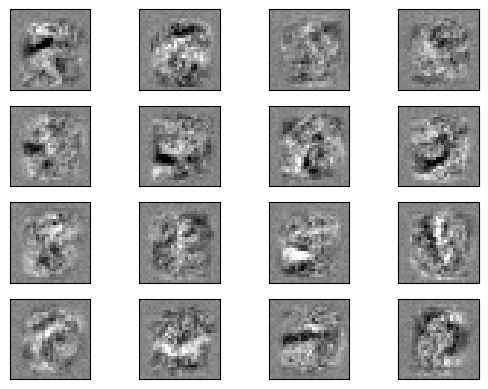

In [ ]:
# A handwritten digit classifier neural network in scikit-learn

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier

# load data
df = pd.read_csv('data/mnist_784.zip', compression='zip', delimiter=",")

# Extract input variables (all rows, all columns but last column) 
# Note we should do some linear scaling here
X = (df.values[:, :-1] / 255.0)

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Get a count of each group to ensure samples are equitably balanced
print(df.groupby(["class"]).agg({"class" : [np.size]})) 

# Separate training and testing data
# Note that I use the 'stratify' parameter to ensure
# each class is proportionally represented in both sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
    test_size=.33, random_state=10, stratify=Y)

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(100, ),
                   activation='logistic',
                   max_iter=480,
                   learning_rate_init=.1)

nn.fit(X_train, Y_train)

print("Training set score: %f" % nn.score(X_train, Y_train))
print("Test set score: %f" % nn.score(X_test, Y_test))

# Display heat map for the first 16 neurons (shows the 784 weights for each)
# features each neuron has "learned" to detect.
import matplotlib.pyplot as plt 
fig, axes = plt.subplots(4, 4)

# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = nn.coefs_[0].min(), nn.coefs_[0].max() 
for coef, ax in zip(nn.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [147]:
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [158]:
df.iloc[:1].values

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
        126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  30,  36

In [159]:
nn.coefs_[0]

array([[-0.03666025, -0.03711241,  0.01619663, ...,  0.01108624,
         0.02335022, -0.03403167],
       [ 0.02231678, -0.01206141, -0.03519766, ...,  0.00852886,
        -0.03668315,  0.04081852],
       [ 0.03199064,  0.04230361,  0.00700576, ..., -0.0339146 ,
        -0.02288235,  0.00348646],
       ...,
       [-0.03824336, -0.02056674,  0.04197291, ..., -0.02556863,
        -0.02737755,  0.03536799],
       [-0.03346209, -0.04468418, -0.0266194 , ...,  0.02561727,
        -0.01272467, -0.00691086],
       [-0.00480966, -0.01927094,  0.03320444, ...,  0.02641174,
         0.04416721, -0.01351913]], shape=(784, 100))

In [160]:
# 2 layers, ReLU + Adam:

nn_adam = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers: 100 and 50 neurons
    activation='relu',             # Try ReLU instead of logistic for better performance
    solver='adam',                 # Faster, better optimizer than SGD
    max_iter=50,                   # Adam usually converges faster
    random_state=1
)

nn_adam.fit(X_train, Y_train)

print("Training set score: %f" % nn_adam.score(X_train, Y_train))
print("Test set score: %f" % nn_adam.score(X_test, Y_test))

Training set score: 1.000000
Test set score: 0.978095
